<a href="https://colab.research.google.com/github/SarahPendhari/TumorSense/blob/main/Brain_Tumor_Detection_Comparative_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
import os

path = os.listdir(r'/content/drive/MyDrive/Dataset/Training')


In [3]:
classes = {'no_tumor' : 0 , 'pituitary_tumor' : 1}
classes

{'no_tumor': 0, 'pituitary_tumor': 1}

In [4]:
import cv2
X = []
Y = []
for cls in classes:
    pth = r'/content/drive/MyDrive/Dataset/Training//'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [5]:
X = np.array(X)
Y = np.array(Y)

In [6]:
np.unique(Y) # 0 - No Tumor(Negative), 1 - Tumor(Positive)

array([0, 1])

In [7]:
pd.Series(Y).value_counts()         #Calculating the count of both the categories

1    827
0    395
dtype: int64

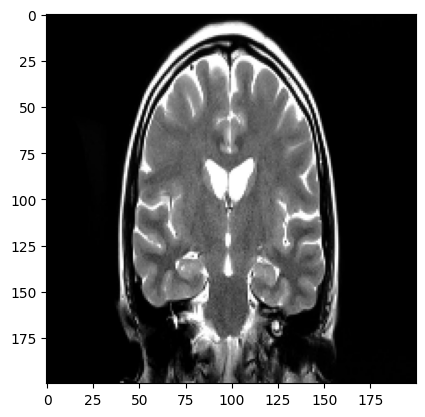

In [8]:
plt.imshow(X[10], cmap='gray')

In [9]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=42,test_size=.20)

In [12]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


clf = DecisionTreeClassifier()
clf.fit(xtrain, ytrain)

# Make predictions on the test
ypred = clf.predict(xtest)

# Evaluate the model
accuracy = accuracy_score(ytest, ypred)
report = classification_report(ytest, ypred)
print(report)
# Print the results
print(f"Accuracy: {accuracy}")
# Assuming your model is trained with 40000 features per sample
# Adjust the resize dimensions accordingly
image = cv2.imread('/content/drive/MyDrive/Dataset/Training/meningioma_tumor/m (6).jpg', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (200, 200))  # Adjusted to create 40000 features (200x200)

pixels = image.reshape(-1)
if len(pixels) == 40000:
    pixels2d = [pixels]
    predicted_class = clf.predict(pixels2d)
    print(f"Predicted Class: {predicted_class[0]}")
else:
    print("Error: Mismatch in feature dimensions.")


              precision    recall  f1-score   support

           0       0.96      0.98      0.97        83
           1       0.99      0.98      0.98       162

    accuracy                           0.98       245
   macro avg       0.98      0.98      0.98       245
weighted avg       0.98      0.98      0.98       245

Accuracy: 0.9795918367346939
Predicted Class: 1


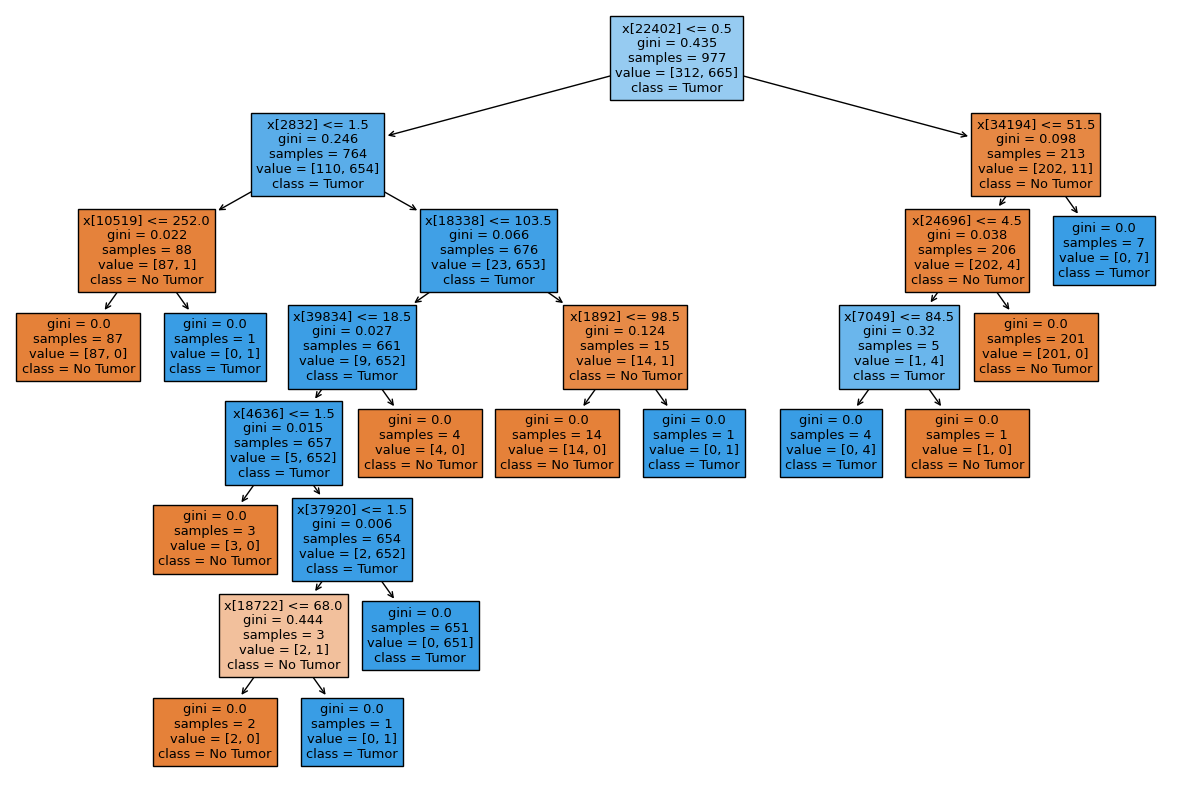

In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=None, class_names=["No Tumor","Tumor"])
plt.savefig('decision_tree.png')
plt.show()

Confusion Matrix:
[[ 81   2]
 [  3 159]]


Normalized Confusion Matrix - Decision Tree:
[[0.97590361 0.02409639]
 [0.01851852 0.98148148]]


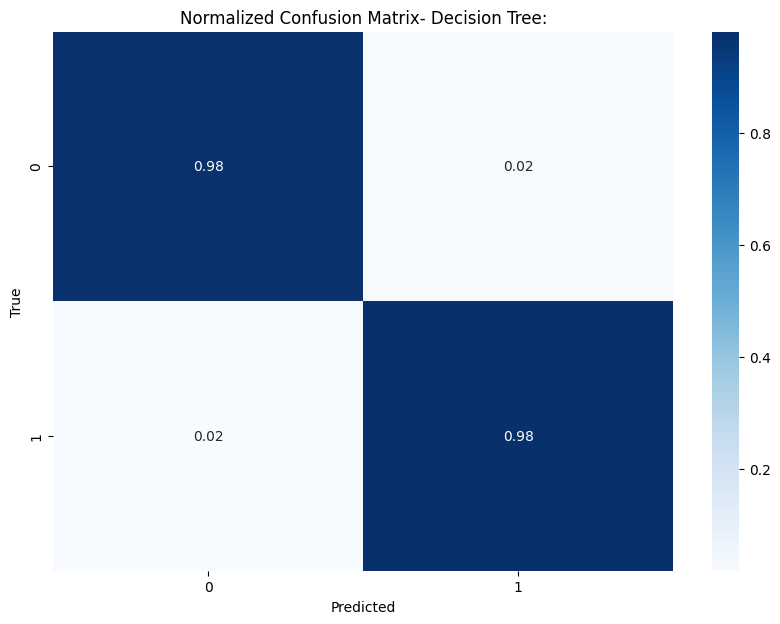

In [15]:
from sklearn.metrics import confusion_matrix

# Assuming ypred and ytest are already defined as per your previous code

# Calculate confusion matrix
conf_matrix = confusion_matrix(ytest, ypred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)
print('\n')
normalized_conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Print the normalized confusion matrix
print("Normalized Confusion Matrix - Decision Tree:")
print(normalized_conf_matrix)

# Plot the normalized confusion matrix with a blue color map
plt.figure(figsize=(10, 7))
sns.heatmap(normalized_conf_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix- Decision Tree:')
plt.show()


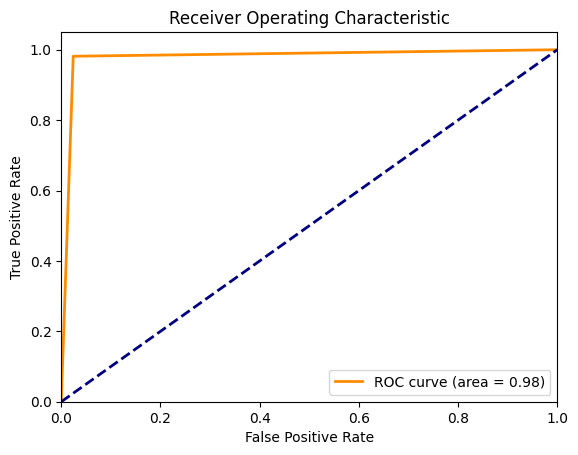

In [16]:
from sklearn.metrics import roc_curve, auc

# Assuming you have a binary classification and ytest, xtest are your test labels and features
# Compute probabilities
y_prob = clf.predict_proba(xtest)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(ytest, y_prob)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


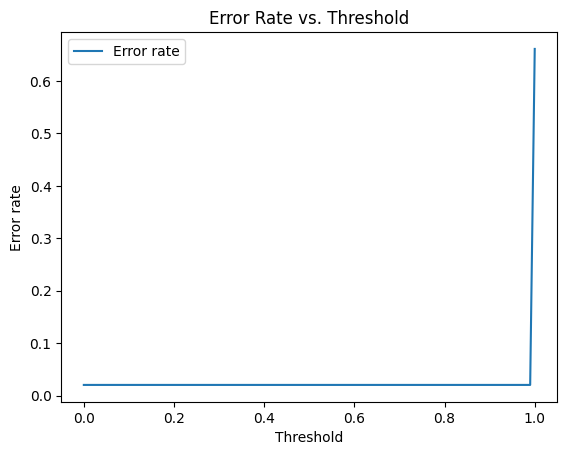

In [17]:
errors = []
thresholds = np.linspace(0, 1, 100)

for thresh in thresholds:
    errors.append(np.mean(((y_prob > thresh) * 1) != ytest))

plt.figure()
plt.plot(thresholds, errors, label='Error rate')
plt.xlabel('Threshold')
plt.ylabel('Error rate')
plt.title('Error Rate vs. Threshold')
plt.legend()
plt.show()


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [19]:
# Create a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators is the number of trees

# Train the model on the training data
rf_clf.fit(xtrain, ytrain)


RandomForestClassifier(random_state=42)

In [20]:
# Make predictions on the test data
y_pred_rf = rf_clf.predict(xtest)

# Evaluate the model
accuracy_rf = accuracy_score(ytest, y_pred_rf)
report_rf = classification_report(ytest, y_pred_rf)

# Print the results
print(f"Random Forest Accuracy: {accuracy_rf}")
print("Random Forest Classification Report:")
print(report_rf)


Random Forest Accuracy: 0.9918367346938776
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        83
           1       1.00      0.99      0.99       162

    accuracy                           0.99       245
   macro avg       0.99      0.99      0.99       245
weighted avg       0.99      0.99      0.99       245



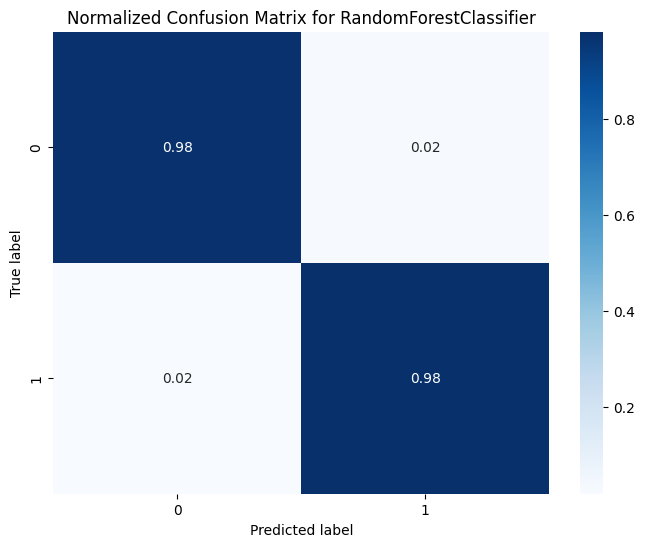

In [21]:
# Compute confusion matrix
cm = confusion_matrix(ytest, ypred)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues',
            xticklabels=rf_clf.classes_, yticklabels=rf_clf.classes_)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Normalized Confusion Matrix for RandomForestClassifier')
plt.show()


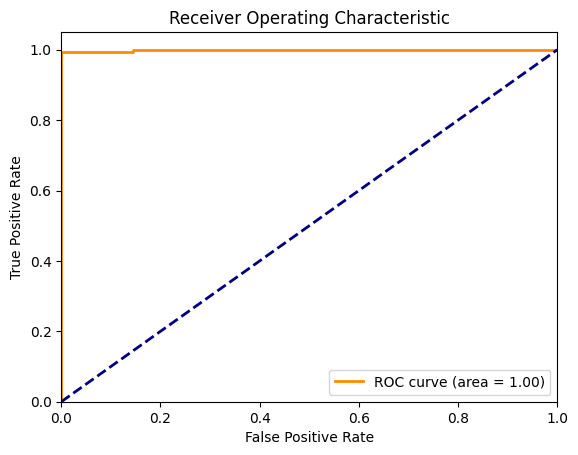

In [22]:
# Assuming you have your test labels in ytest and
# your model's predicted probabilities for the positive class in y_scores
y_scores = rf_clf.predict_proba(xtest)[:, 1]  # For binary classification

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(ytest, y_scores)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


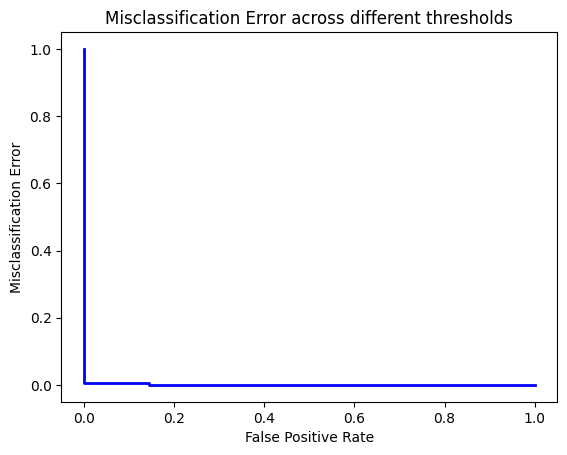

In [23]:
# Calculate the misclassification for each threshold
misclassification = 1 - tpr

# Plotting
plt.figure()
plt.plot(fpr, misclassification, color='blue', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error across different thresholds')
plt.show()


In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(xtrain, ytrain)
# Making predictions
ypred_knn = knn_clf.predict(xtest)

# Evaluating the model
accuracy_knn = accuracy_score(ytest, ypred_knn)
report_knn = classification_report(ytest, ypred_knn)

# Print the results
print(f"Accuracy: {accuracy_knn}")
print("Classification Report:")
print(report_knn)


Accuracy: 0.9387755102040817
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        83
           1       0.92      1.00      0.96       162

    accuracy                           0.94       245
   macro avg       0.96      0.91      0.93       245
weighted avg       0.94      0.94      0.94       245



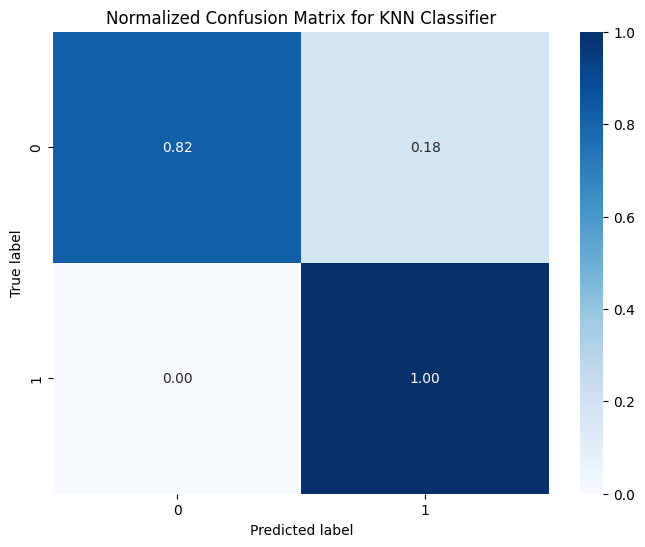

In [26]:
cm_knn = confusion_matrix(ytest, ypred_knn)
cm_knn_normalized = cm_knn.astype('float') / cm_knn.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn_normalized, annot=True, fmt=".2f", cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Normalized Confusion Matrix for KNN Classifier')
plt.show()


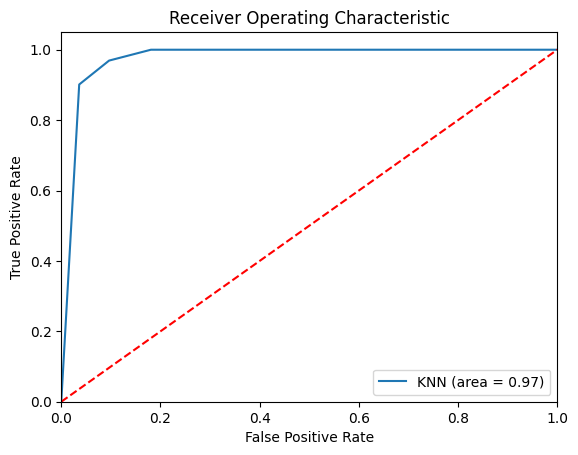

In [27]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming your model and test data are named knn_classifier, Xtest, ytest
# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn_clf.predict_proba(xtest)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


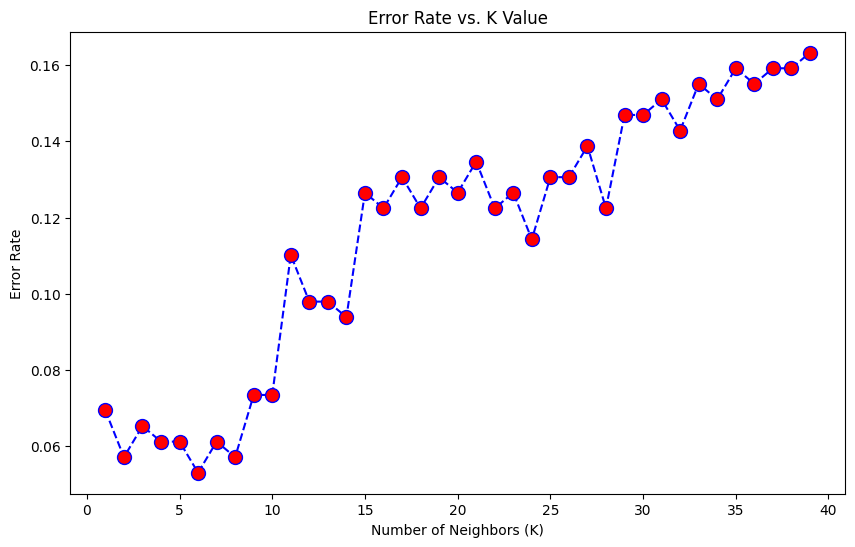

In [28]:
error_rate = []
for i in range(1, 40):  # Assuming you want to test from 1 to 39 neighbors
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    pred_i = knn.predict(xtest)
    error_rate.append(np.mean(pred_i != ytest))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Error Rate')
plt.show()


In [29]:
from sklearn import svm
# Create a SVM classifier with a linear kernel
svm_clf = svm.SVC(kernel='linear')

# Train the model on the training data
svm_clf.fit(xtrain, ytrain)
# Predict the response for the test dataset
y_pred = svm_clf.predict(xtest)

# Calculate accuracy
accuracy = accuracy_score(ytest, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report for detailed analysis
print(classification_report(ytest, y_pred))


Accuracy: 0.9346938775510204
              precision    recall  f1-score   support

           0       0.96      0.84      0.90        83
           1       0.92      0.98      0.95       162

    accuracy                           0.93       245
   macro avg       0.94      0.91      0.92       245
weighted avg       0.94      0.93      0.93       245



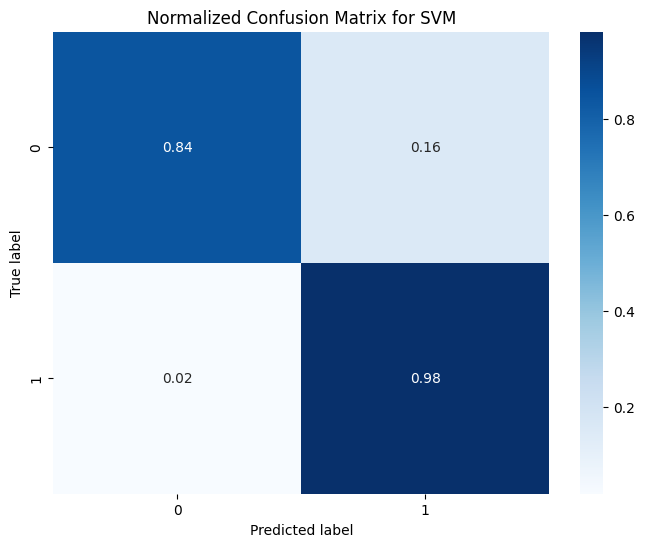

In [30]:
# Compute confusion matrix
cm = confusion_matrix(ytest, y_pred)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues")
plt.title('Normalized Confusion Matrix for SVM')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


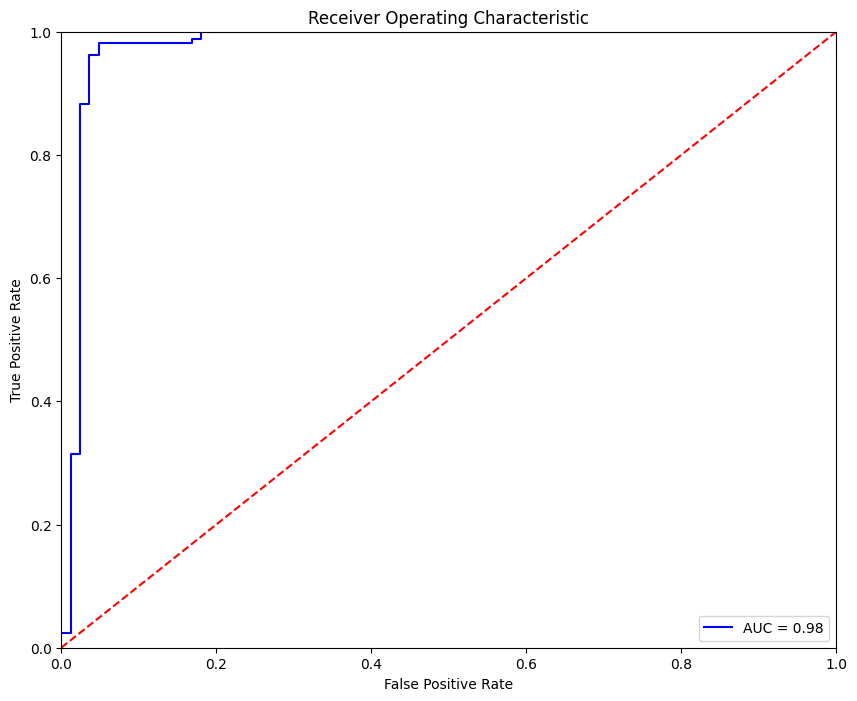

In [31]:

y_scores = svm_clf.decision_function(xtest)
fpr, tpr, threshold = roc_curve(ytest, y_scores)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


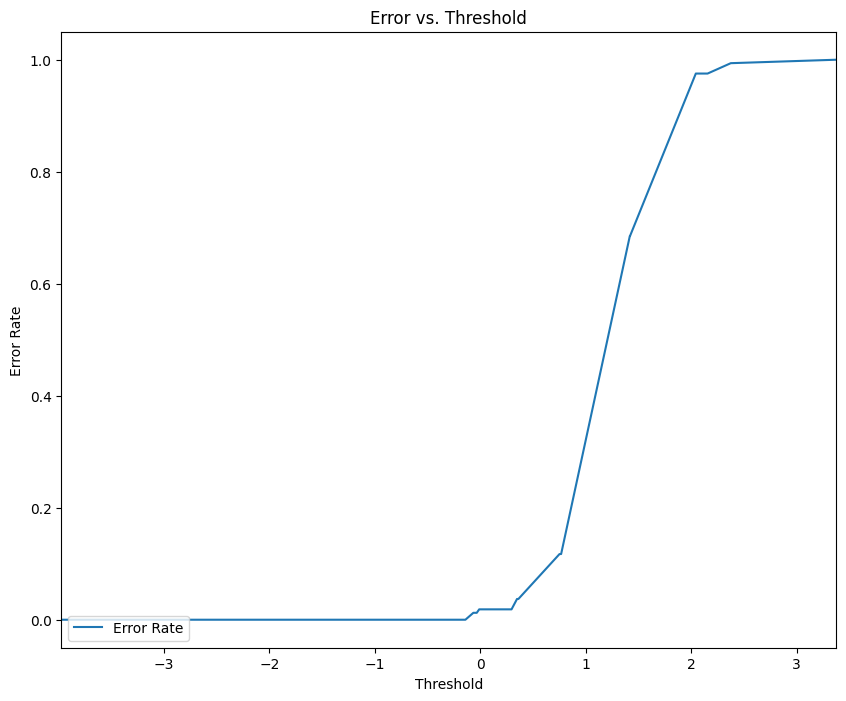

In [32]:
plt.figure(figsize=(10, 8))
plt.title('Error vs. Threshold')
plt.plot(threshold, 1 - tpr, label='Error Rate')
plt.legend(loc = 'lower left')
plt.xlim([threshold.min(), threshold.max()])
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.show()


In [33]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

# Load and preprocess data
def load_data(directory, classes):
    X = []
    Y = []
    for idx, cls in enumerate(classes):
        path = os.path.join(directory, cls)
        for img in os.listdir(path):
            try:
                image = cv2.imread(os.path.join(path, img))
                image = cv2.resize(image, (100, 100))  # Resize images
                X.append(image)
                Y.append(idx)
            except Exception as e:
                print(e)
    return np.array(X), np.array(Y)

# Classes
classes = ['no_tumor', 'pituitary_tumor']  # Update with your classes
data_directory = '/content/drive/MyDrive/Dataset/Training//'  # Update with your dataset path

# Load dataset
X, Y = load_data(data_directory, classes)

# Normalize the data
X = X / 255.0

# One-hot encode labels
Y = to_categorical(Y, num_classes=len(classes))

# Split the data
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

# Build CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(classes), activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(xtrain, ytrain, epochs=10, validation_data=(xtest, ytest))

# Evaluate the model
test_loss, test_acc = model.evaluate(xtest, ytest)
print(f"Test Accuracy: {test_acc}")

# Model summary
model.summary()


Epoch 1/10
31/31 [==============================] - 9s 48ms/step - loss: 0.6456 - accuracy: 0.7523 - val_loss: 0.4260 - val_accuracy: 0.8939
Epoch 2/10
31/31 [==============================] - 1s 16ms/step - loss: 0.2830 - accuracy: 0.8905 - val_loss: 0.1907 - val_accuracy: 0.9306
Epoch 3/10
31/31 [==============================] - 0s 16ms/step - loss: 0.1418 - accuracy: 0.9447 - val_loss: 0.1590 - val_accuracy: 0.9265
Epoch 4/10
31/31 [==============================] - 1s 17ms/step - loss: 0.1045 - accuracy: 0.9672 - val_loss: 0.0822 - val_accuracy: 0.9837
Epoch 5/10
31/31 [==============================] - 0s 16ms/step - loss: 0.0599 - accuracy: 0.9785 - val_loss: 0.1341 - val_accuracy: 0.9592
Epoch 6/10
31/31 [==============================] - 1s 17ms/step - loss: 0.0662 - accuracy: 0.9765 - val_loss: 0.0612 - val_accuracy: 0.9878
Epoch 7/10
31/31 [==============================] - 1s 16ms/step - loss: 0.0548 - accuracy: 0.9857 - val_loss: 0.0568 - val_accuracy: 0.9878
Epoch 8/10
31

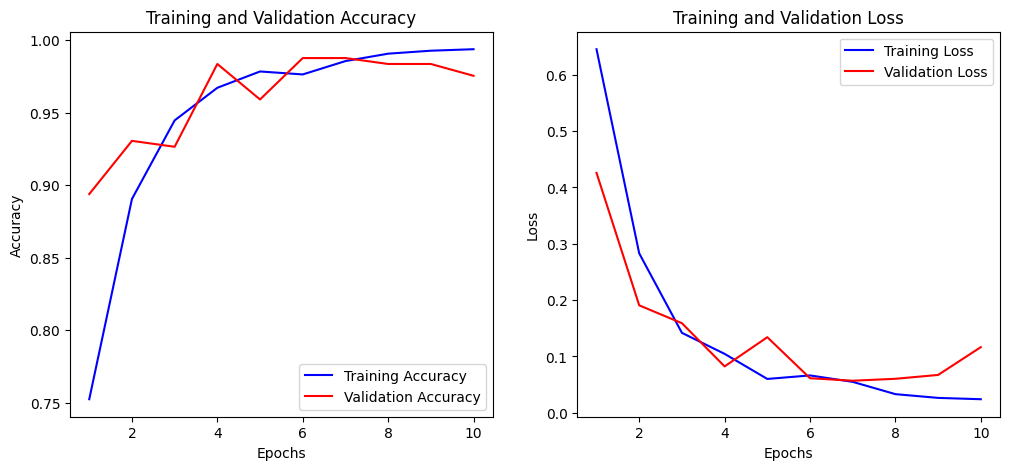

In [34]:
history_dict = history.history

# Extract accuracy and loss values for training
acc = history_dict['accuracy']
loss = history_dict['loss']

# Extract accuracy and loss values for validation
val_acc = history_dict['val_accuracy']
val_loss = history_dict['val_loss']

# Range of epochs
epochs = range(1, len(acc) + 1)

# Accuracy plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, '-', label='Training Accuracy', color='blue')  # Blue for training
plt.plot(epochs, val_acc, '-', label='Validation Accuracy', color='red')  # Green for validation
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, '-', label='Training Loss', color='blue')  # Blue for training
plt.plot(epochs, val_loss, '-', label='Validation Loss', color='red')  # Green for validation
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [35]:
# Predict classes
y_pred = model.predict(xtest)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(ytest, axis=1)

# Classification report
report = classification_report(y_true, y_pred_classes, target_names=classes, output_dict=True)

# Printing the report
print("Classification Report: \n")
for key, value in report.items():
    if key == 'accuracy':
        print(f"Accuracy: {value*100:.2f}%")
    elif key in classes:
        print(f"\nClass - {key}")
        print(f"Precision: {value['precision']*100:.2f}%")
        print(f"Recall: {value['recall']*100:.2f}%")
        print(f"F1-score: {value['f1-score']*100:.2f}%")

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
tn, fp, fn, tp = cm.ravel()

# Calculate Specificity
specificity = tn / (tn + fp)
print(f"\nSpecificity: {specificity*100:.2f}%")


8/8 [==============================] - 0s 4ms/step
Classification Report: 


Class - no_tumor
Precision: 100.00%
Recall: 92.77%
F1-score: 96.25%

Class - pituitary_tumor
Precision: 96.43%
Recall: 100.00%
F1-score: 98.18%
Accuracy: 97.55%

Specificity: 92.77%


In [36]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [37]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input

# VGG16 model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(100, 100, 3)))

# Freeze the layers of VGG16
for layer in vgg16_model.layers:
    layer.trainable = False

# Build the model
model_vgg16 = Sequential()
model_vgg16.add(vgg16_model)
model_vgg16.add(Flatten())
model_vgg16.add(Dense(64, activation='relu'))
model_vgg16.add(Dropout(0.5))
model_vgg16.add(Dense(len(classes), activation='softmax'))

# Compile
model_vgg16.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history_vgg16 = model_vgg16.fit(xtrain, ytrain, epochs=10, validation_data=(xtest, ytest))

vgg16_loss, vgg16_accuracy = model_vgg16.evaluate(xtest, ytest)
print(f"VGG16 Test Accuracy: {vgg16_accuracy}")

58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/10
31/31 [==============================] - 8s 167ms/step - loss: 0.4644 - accuracy: 0.7994 - val_loss: 0.2611 - val_accuracy: 0.9265
Epoch 2/10
31/31 [==============================] - 1s 41ms/step - loss: 0.2109 - accuracy: 0.9365 - val_loss: 0.1379 - val_accuracy: 0.9469
Epoch 3/10
31/31 [==============================] - 1s 43ms/step - loss: 0.1363 - accuracy: 0.9560 - val_loss: 0.1209 - val_accuracy: 0.9469
Epoch 4/10
31/31 [==============================] - 1s 44ms/step - loss: 0.1229 - accuracy: 0.9591 - val_loss: 0.1584 - val_accuracy: 0.9306
Epoch 5/10
31/31 [==============================] - 1s 42ms/step - loss: 0.0898 - accuracy: 0.9713 - val_loss: 0.0649 - val_accuracy: 0.9673
Epoch 6/10
31/31 [==============================] - 1s 44ms/step - loss: 0.0664 - accuracy: 0.9795 - val_loss: 0.0737 - val_accuracy: 0.9673
Epoch 7/10
31/31 [==============================] - 1s 46ms/step - loss: 0.0530 - accura

In [38]:
def plot_metrics(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
    plt.title(f'Training and Validation Accuracy for {title}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.title(f'Training and Validation Loss for {title}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()


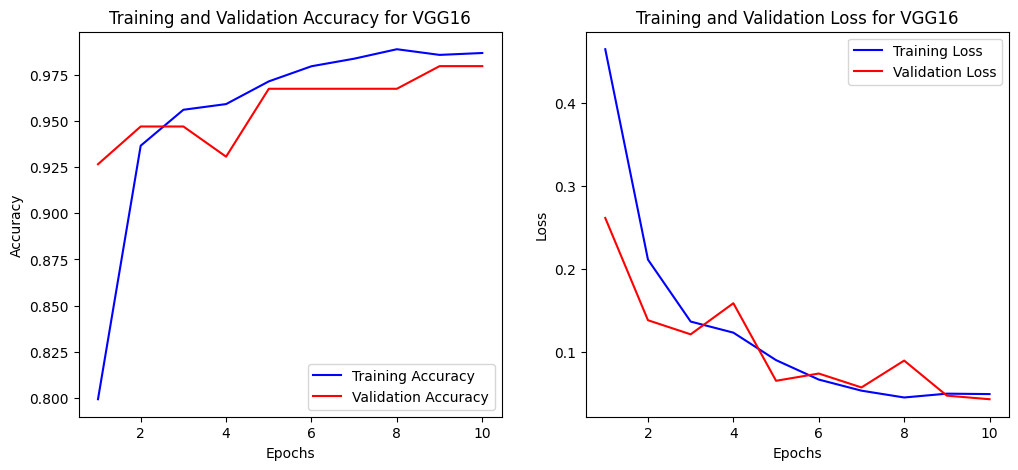

In [39]:
plot_metrics(history_vgg16, "VGG16")

In [40]:
# Predict classes for VGG16
y_pred_vgg16 = model_vgg16.predict(xtest)
y_pred_classes_vgg16 = np.argmax(y_pred_vgg16, axis=1)
y_true = np.argmax(ytest, axis=1)

# Classification report for VGG16
report_vgg16 = classification_report(y_true, y_pred_classes_vgg16, target_names=classes, output_dict=True)

# Printing the report for VGG16
print("VGG16 Classification Report: \n")
for key, value in report_vgg16.items():
    if key == 'accuracy':
        print(f"Accuracy: {value*100:.2f}%")
    elif key in classes:
        print(f"\nClass - {key}")
        print(f"Precision: {value['precision']*100:.2f}%")
        print(f"Recall: {value['recall']*100:.2f}%")
        print(f"F1-score: {value['f1-score']*100:.2f}%")

# Confusion matrix for VGG16
cm_vgg16 = confusion_matrix(y_true, y_pred_classes_vgg16)
tn, fp, fn, tp = cm_vgg16.ravel()

# Calculate Specificity for VGG16
specificity_vgg16 = tn / (tn + fp)
print(f"\nSpecificity: {specificity_vgg16*100:.2f}%")


8/8 [==============================] - 0s 29ms/step
VGG16 Classification Report: 


Class - no_tumor
Precision: 98.75%
Recall: 95.18%
F1-score: 96.93%

Class - pituitary_tumor
Precision: 97.58%
Recall: 99.38%
F1-score: 98.47%
Accuracy: 97.96%

Specificity: 95.18%


In [41]:
from tensorflow.keras.applications import VGG19

# VGG19 model
vgg19_model = VGG19(weights='imagenet', include_top=False, input_tensor=Input(shape=(100, 100, 3)))

# Freeze the layers of VGG19
for layer in vgg19_model.layers:
    layer.trainable = False

# Build the model
model_vgg19 = Sequential()
model_vgg19.add(vgg19_model)
model_vgg19.add(Flatten())
model_vgg19.add(Dense(64, activation='relu'))
model_vgg19.add(Dropout(0.5))
model_vgg19.add(Dense(len(classes), activation='softmax'))

# Compile
model_vgg19.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history_vgg19 = model_vgg19.fit(xtrain, ytrain, epochs=10, validation_data=(xtest, ytest))

vgg19_loss, vgg19_accuracy = model_vgg19.evaluate(xtest, ytest)
print(f"VGG19 Test Accuracy: {vgg19_accuracy}")

80134624/80134624 [==============================] - 0s 0us/step
Epoch 1/10
31/31 [==============================] - 3s 64ms/step - loss: 0.5936 - accuracy: 0.7421 - val_loss: 0.3162 - val_accuracy: 0.8735
Epoch 2/10
31/31 [==============================] - 2s 62ms/step - loss: 0.2506 - accuracy: 0.9130 - val_loss: 0.1788 - val_accuracy: 0.9347
Epoch 3/10
31/31 [==============================] - 2s 63ms/step - loss: 0.1665 - accuracy: 0.9468 - val_loss: 0.1328 - val_accuracy: 0.9429
Epoch 4/10
31/31 [==============================] - 2s 51ms/step - loss: 0.1287 - accuracy: 0.9560 - val_loss: 0.1208 - val_accuracy: 0.9429
Epoch 5/10
31/31 [==============================] - 2s 51ms/step - loss: 0.1074 - accuracy: 0.9703 - val_loss: 0.0800 - val_accuracy: 0.9633
Epoch 6/10
31/31 [==============================] - 2s 51ms/step - loss: 0.0910 - accuracy: 0.9713 - val_loss: 0.0757 - val_accuracy: 0.9714
Epoch 7/10
31/31 [==============================] - 2s 51ms/step - loss: 0.0804 - accurac

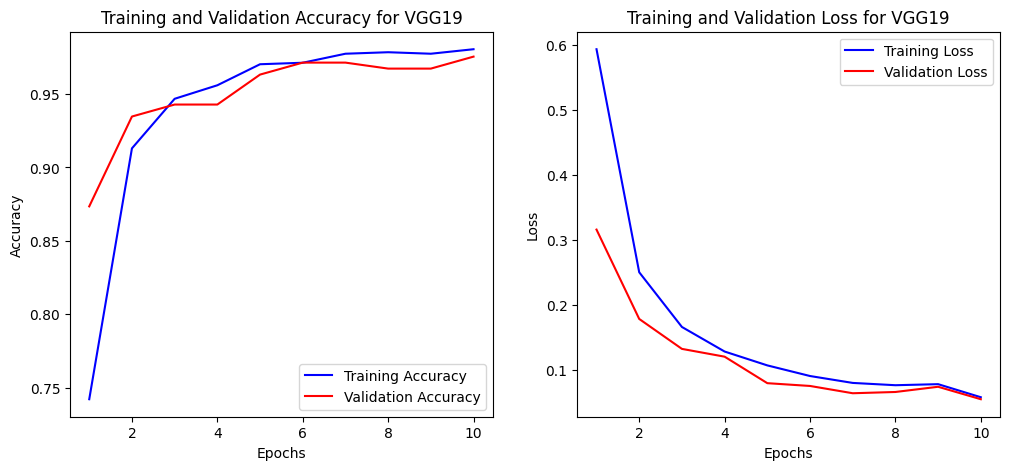

In [42]:
plot_metrics(history_vgg19, "VGG19")

In [43]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load the ResNet50 model pre-trained on ImageNet data
resnet50_model = ResNet50(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

# Freeze the layers
for layer in resnet50_model.layers:
    layer.trainable = False

# Build the model
model_resnet50 = Sequential()
model_resnet50.add(resnet50_model)
model_resnet50.add(GlobalAveragePooling2D())
model_resnet50.add(Dense(256, activation='relu'))
model_resnet50.add(Dense(len(classes), activation='softmax'))  # assuming 'classes' is defined as before

# Compile the model
model_resnet50.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history_resnet50 = model_resnet50.fit(xtrain, ytrain, epochs=10, validation_data=(xtest, ytest))

# Evaluate the model
loss_resnet50, accuracy_resnet50 = model_resnet50.evaluate(xtest, ytest)
print(f"ResNet-50 Model - Loss: {loss_resnet50}, Accuracy: {accuracy_resnet50}")

# Model Summary
model_resnet50.summary()


94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/10
31/31 [==============================] - 10s 139ms/step - loss: 0.7498 - accuracy: 0.6684 - val_loss: 0.5497 - val_accuracy: 0.7510
Epoch 2/10
31/31 [==============================] - 1s 39ms/step - loss: 0.4416 - accuracy: 0.8229 - val_loss: 0.4295 - val_accuracy: 0.8204
Epoch 3/10
31/31 [==============================] - 1s 39ms/step - loss: 0.3987 - accuracy: 0.8373 - val_loss: 0.3698 - val_accuracy: 0.8408
Epoch 4/10
31/31 [==============================] - 1s 42ms/step - loss: 0.3629 - accuracy: 0.8454 - val_loss: 0.4944 - val_accuracy: 0.7755
Epoch 5/10
31/31 [==============================] - 1s 39ms/step - loss: 0.3516 - accuracy: 0.8516 - val_loss: 0.3278 - val_accuracy: 0.8531
Epoch 6/10
31/31 [==============================] - 1s 39ms/step - loss: 0.3241 - accuracy: 0.8659 - val_loss: 0.3025 - val_accuracy: 0.8857
Epoch 7/10
31/31 [==============================] - 1s 43ms/step - loss: 0.3251 - accur

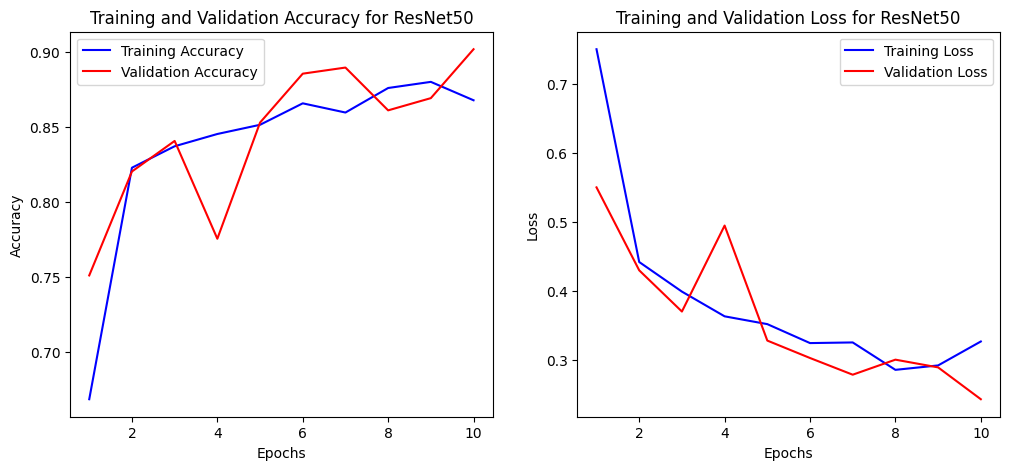

In [44]:
plot_metrics(history_resnet50, "ResNet50")

In [52]:
def precision(conf_matrix):
    return conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])

def recall(conf_matrix):
    return conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])

def specificity(conf_matrix):
    return conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

def f1_score(conf_matrix):
    prec = precision(conf_matrix)
    rec = recall(conf_matrix)
    return 2 * (prec * rec) / (prec + rec)

In [53]:
def display_metrics(model_name, conf_matrix):
    acc = np.trace(conf_matrix) / np.sum(conf_matrix)
    prec = precision(conf_matrix)
    rec = recall(conf_matrix)
    spec = specificity(conf_matrix)
    f1 = f1_score(conf_matrix)

    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {acc * 100:.2f}%")
    print(f"Precision: {prec * 100:.2f}%")
    print(f"Recall: {rec * 100:.2f}%")
    print(f"Specificity: {spec * 100:.2f}%")
    print(f"F1-Score: {f1 * 100:.2f}%")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()


In [54]:
# Predict classes for VGG16
y_pred_vgg16 = model_vgg16.predict(xtest)
y_pred_classes_vgg16 = np.argmax(y_pred_vgg16, axis=1)
y_true = np.argmax(ytest, axis=1)

# Classification report for VGG16
report_vgg16 = classification_report(y_true, y_pred_classes_vgg16, target_names=classes, output_dict=True)

# Printing the report for VGG16
print("VGG16 Classification Report: \n")
for key, value in report_vgg16.items():
    if key == 'accuracy':
        print(f"Accuracy: {value*100:.2f}%")
    elif key in classes:
        print(f"\nClass - {key}")
        print(f"Precision: {value['precision']*100:.2f}%")
        print(f"Recall: {value['recall']*100:.2f}%")
        print(f"F1-score: {value['f1-score']*100:.2f}%")

# Confusion matrix for VGG16
cm_vgg16 = confusion_matrix(y_true, y_pred_classes_vgg16)
tn, fp, fn, tp = cm_vgg16.ravel()

# Calculate Specificity for VGG16
specificity_vgg16 = tn / (tn + fp)
print(f"\nSpecificity: {specificity_vgg16*100:.2f}%")
print("----------------------------------------------------------------------------------------------------\n")
# Predict classes for VGG19
y_pred_vgg19 = model_vgg19.predict(xtest)
y_pred_classes_vgg19 = np.argmax(y_pred_vgg19, axis=1)
y_true = np.argmax(ytest, axis=1)

# Classification report for VGG19
report_vgg19 = classification_report(y_true, y_pred_classes_vgg19, target_names=classes, output_dict=True)

# Printing the report for VGG19
print("VGG19 Classification Report: \n")
for key, value in report_vgg19.items():
    if key == 'accuracy':
        print(f"Accuracy: {value*100:.2f}%")
    elif key in classes:
        print(f"\nClass - {key}")
        print(f"Precision: {value['precision']*100:.2f}%")
        print(f"Recall: {value['recall']*100:.2f}%")
        print(f"F1-score: {value['f1-score']*100:.2f}%")

# Confusion matrix for VGG16
cm_vgg19 = confusion_matrix(y_true, y_pred_classes_vgg16)
tn, fp, fn, tp = cm_vgg19.ravel()

# Calculate Specificity for VGG16
specificity_vgg19 = tn / (tn + fp)
print(f"\nSpecificity: {specificity_vgg19*100:.2f}%")
print("-------------------------------------------------------------------------------------------------------\n")

# Predict classes for ResNet-50
y_pred_resnet50 = model_resnet50.predict(xtest)
y_pred_classes_resnet50 = np.argmax(y_pred_resnet50, axis=1)
y_true = np.argmax(ytest, axis=1)

# Classification report for ResNet-50
report_resnet50 = classification_report(y_true, y_pred_classes_resnet50, target_names=classes, output_dict=True)

# Printing the report for ResNet-50
print("Resnet-50 Classification Report: \n")
for key, value in report_resnet50.items():
    if key == 'accuracy':
        print(f"Accuracy: {value*100:.2f}%")
    elif key in classes:
        print(f"\nClass - {key}")
        print(f"Precision: {value['precision']*100:.2f}%")
        print(f"Recall: {value['recall']*100:.2f}%")
        print(f"F1-score: {value['f1-score']*100:.2f}%")

# Confusion matrix for Resnet-50
cm_resnet50 = confusion_matrix(y_true, y_pred_classes_resnet50)
tn, fp, fn, tp = cm_resnet50.ravel()

# Calculate Specificity for Resnet-50
specificity_resnet50 = tn / (tn + fp)
print(f"\nSpecificity: {specificity_resnet50*100:.2f}%")

print("-------------------------------------------------------------------------------------------------------\n")



8/8 [==============================] - 0s 41ms/step
VGG16 Classification Report: 


Class - no_tumor
Precision: 98.75%
Recall: 95.18%
F1-score: 96.93%

Class - pituitary_tumor
Precision: 97.58%
Recall: 99.38%
F1-score: 98.47%
Accuracy: 97.96%

Specificity: 95.18%
----------------------------------------------------------------------------------------------------

8/8 [==============================] - 0s 39ms/step
VGG19 Classification Report: 


Class - no_tumor
Precision: 97.53%
Recall: 95.18%
F1-score: 96.34%

Class - pituitary_tumor
Precision: 97.56%
Recall: 98.77%
F1-score: 98.16%
Accuracy: 97.55%

Specificity: 95.18%
-------------------------------------------------------------------------------------------------------

8/8 [==============================] - 1s 27ms/step
Resnet-50 Classification Report: 


Class - no_tumor
Precision: 94.03%
Recall: 75.90%
F1-score: 84.00%

Class - pituitary_tumor
Precision: 88.76%
Recall: 97.53%
F1-score: 92.94%
Accuracy: 90.20%

Specificity: 75.9

In [67]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Assuming xtrain, ytrain, xtest, and ytest are already defined and preprocessed

# Load MobileNet with pre-trained weights, without the top classification layer
mobilenet_model = MobileNet(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
model_mobilenet = Sequential([
    mobilenet_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dense(2, activation='softmax')  # Assuming binary classification for tumors
])

model_mobilenet.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history_mobilenet = model_mobilenet.fit(xtrain, ytrain, batch_size=32, epochs=10, validation_data=(xtest, ytest))
mobilenet_test_loss, mobilenet_test_acc = model_mobilenet.evaluate(xtest, ytest)
print(f"MobileNet Test Accuracy: {mobilenet_test_acc}")
print(f"MobileNet Test Loss: {mobilenet_test_loss}")

# Predict classes using the test data
y_pred = model_mobilenet.predict(xtest)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(ytest, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision, recall, and F1-score
report = classification_report(y_true, y_pred_classes)
print("Classification Report:")
print(report)


Epoch 1/10
31/31 [==============================] - 17s 59ms/step - loss: 0.2592 - accuracy: 0.8792 - val_loss: 0.3088 - val_accuracy: 0.8653
Epoch 2/10
31/31 [==============================] - 1s 37ms/step - loss: 0.0212 - accuracy: 0.9939 - val_loss: 0.1999 - val_accuracy: 0.9429
Epoch 3/10
31/31 [==============================] - 1s 39ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.1380 - val_accuracy: 0.9551
Epoch 4/10
31/31 [==============================] - 1s 40ms/step - loss: 0.0073 - accuracy: 0.9990 - val_loss: 0.1276 - val_accuracy: 0.9592
Epoch 5/10
31/31 [==============================] - 1s 37ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.1310 - val_accuracy: 0.9592
Epoch 6/10
31/31 [==============================] - 1s 37ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1280 - val_accuracy: 0.9633
Epoch 7/10
31/31 [==============================] - 1s 40ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1147 - val_accuracy: 0.9673
Epoch 8/10
3

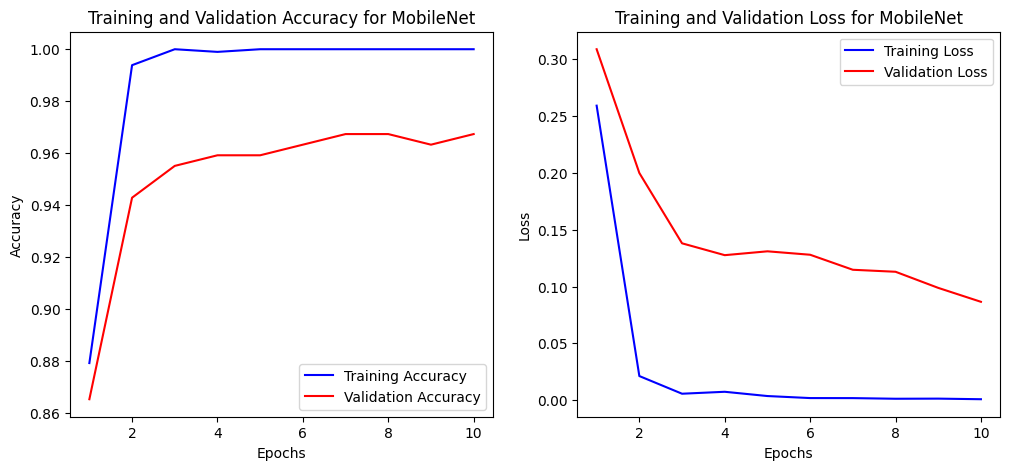

In [68]:
plot_metrics(history_mobilenet, "MobileNet")

In [69]:
model_mobilenet.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 3, 3, 1024)        3228864   
 onal)                                                           
                                                                 
 global_average_pooling2d_6  (None, 1024)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_18 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_19 (Dense)            (None, 2)                 2050      
                                                                 
Total params: 4280514 (16.33 MB)
Trainable params: 4258626 (16.25 MB)
Non-trainable params: 21888 (85.50 KB)
_________________________________________________________________


In [71]:
# Printing the report for MobileNet
print("MobileNet Classification Report: \n")
for key, value in report_mobilenet.items():
    if key == 'accuracy':
        print(f"Accuracy: {value*100:.2f}%")
    elif key in classes:
        print(f"\nClass - {key}")
        print(f"Precision: {value['precision']*100:.2f}%")
        print(f"Recall: {value['recall']*100:.2f}%")
        print(f"F1-score: {value['f1-score']*100:.2f}%")

# Confusion matrix for Resnet-50
cm_mobilenet = confusion_matrix(y_true, y_pred_classes_mobilenet)
tn, fp, fn, tp = cm_mobilenet.ravel()

# Calculate Specificity for Resnet-50
specificity_mobilenet = tn / (tn + fp)
print(f"\nSpecificity: {specificity_mobilenet*100:.2f}%")

MobileNet Classification Report: 


Class - no_tumor
Precision: 33.33%
Recall: 3.61%
F1-score: 6.52%

Class - pituitary_tumor
Precision: 66.10%
Recall: 96.30%
F1-score: 78.39%
Accuracy: 64.90%

Specificity: 3.61%


In [75]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load the InceptionV3 model pre-trained on ImageNet data
inceptionv3_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

# Freeze the layers of InceptionV3
for layer in inceptionv3_model.layers:
    layer.trainable = False

# Build the model
model_inceptionv3 = Sequential()
model_inceptionv3.add(inceptionv3_model)
model_inceptionv3.add(GlobalAveragePooling2D())
model_inceptionv3.add(Dense(1024, activation='relu'))
model_inceptionv3.add(Dense(2, activation='softmax'))  # Assuming binary classification for tumors

# Compile the model
model_inceptionv3.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history_inceptionv3 = model_inceptionv3.fit(xtrain, ytrain, batch_size=32, epochs=10, validation_data=(xtest, ytest))

# Evaluate the model
inceptionv3_test_loss, inceptionv3_test_acc = model_inceptionv3.evaluate(xtest, ytest)
print(f"InceptionV3 Test Accuracy: {inceptionv3_test_acc}")
print(f"InceptionV3 Test Loss: {inceptionv3_test_loss}")


Epoch 1/10
31/31 [==============================] - 13s 147ms/step - loss: 0.3577 - accuracy: 0.8424 - val_loss: 0.2020 - val_accuracy: 0.9224
Epoch 2/10
31/31 [==============================] - 1s 43ms/step - loss: 0.1290 - accuracy: 0.9529 - val_loss: 0.1516 - val_accuracy: 0.9469
Epoch 3/10
31/31 [==============================] - 1s 33ms/step - loss: 0.0880 - accuracy: 0.9734 - val_loss: 0.1352 - val_accuracy: 0.9510
Epoch 4/10
31/31 [==============================] - 1s 42ms/step - loss: 0.0596 - accuracy: 0.9826 - val_loss: 0.1086 - val_accuracy: 0.9714
Epoch 5/10
31/31 [==============================] - 1s 46ms/step - loss: 0.0379 - accuracy: 0.9959 - val_loss: 0.1047 - val_accuracy: 0.9755
Epoch 6/10
31/31 [==============================] - 1s 42ms/step - loss: 0.0312 - accuracy: 0.9959 - val_loss: 0.1052 - val_accuracy: 0.9755
Epoch 7/10
31/31 [==============================] - 2s 52ms/step - loss: 0.0247 - accuracy: 0.9990 - val_loss: 0.1072 - val_accuracy: 0.9755
Epoch 8/10


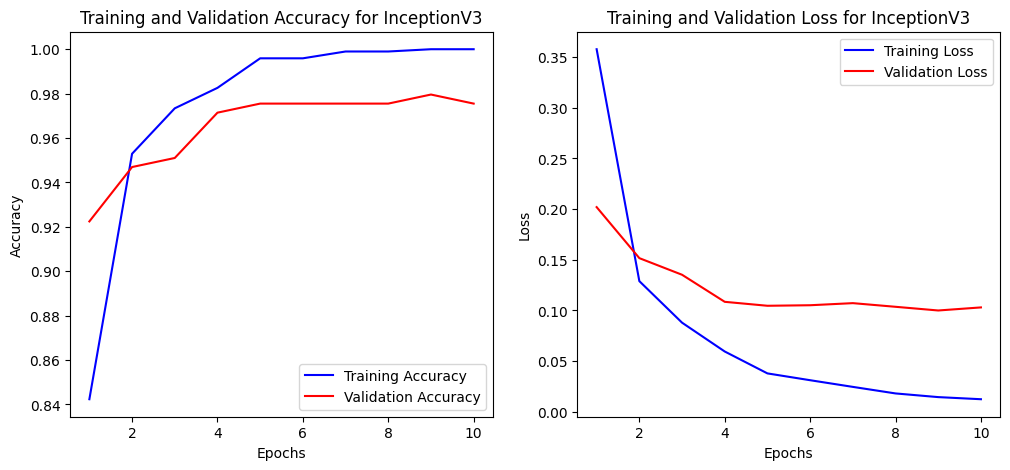

In [76]:
plot_metrics(history_inceptionv3, "InceptionV3")

In [77]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Make predictions
y_pred = model_inceptionv3.predict(xtest)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(ytest, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Compute the classification report
clf_report = classification_report(y_true, y_pred_classes)
print("Classification Report:")
print(clf_report)


8/8 [==============================] - 3s 32ms/step
Confusion Matrix:
[[ 78   5]
 [  1 161]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        83
           1       0.97      0.99      0.98       162

    accuracy                           0.98       245
   macro avg       0.98      0.97      0.97       245
weighted avg       0.98      0.98      0.98       245



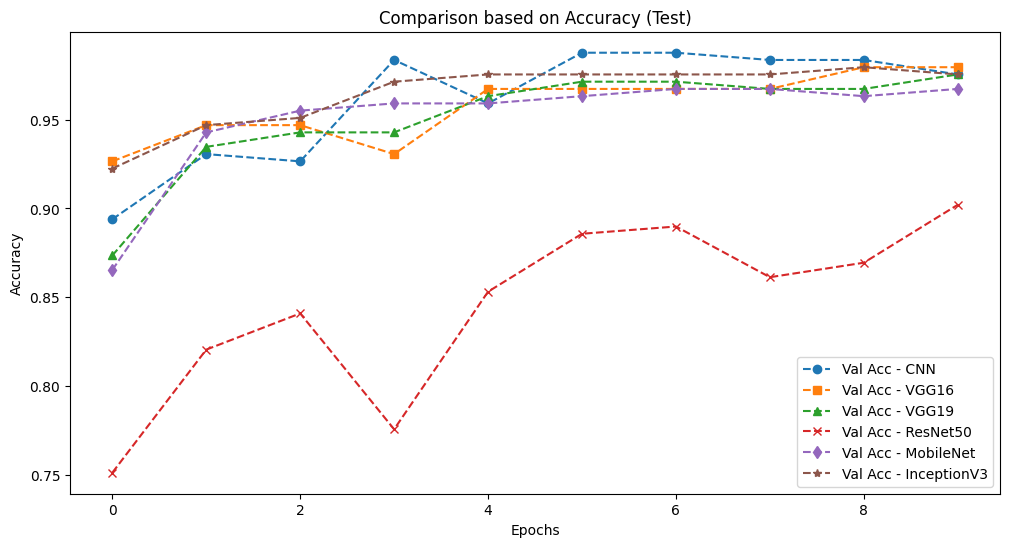

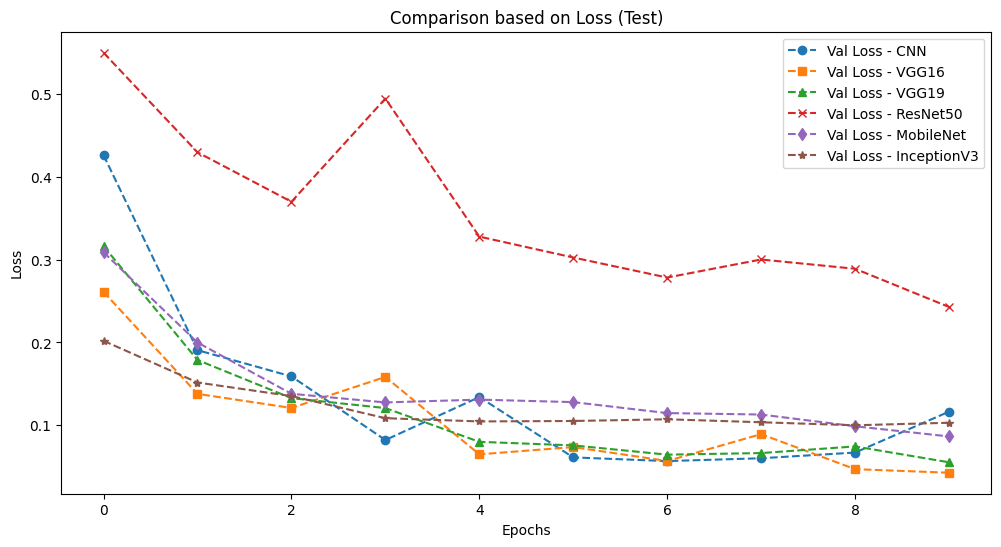

In [80]:
# Accuracy Comparison
plt.figure(figsize=(12, 6))
#plt.plot(history.history['accuracy'], 'o-', label='Train Acc - CNN')
plt.plot(history.history['val_accuracy'], 'o--', label='Val Acc - CNN')
#plt.plot(history_vgg16.history['accuracy'], 's-', label='Train Acc - VGG16')
plt.plot(history_vgg16.history['val_accuracy'], 's--', label='Val Acc - VGG16')
#plt.plot(history_vgg19.history['accuracy'], '^-', label='Train Acc - VGG19')
plt.plot(history_vgg19.history['val_accuracy'], '^--', label='Val Acc - VGG19')
#plt.plot(history_resnet50.history['accuracy'], 'x-', label='Train Acc - ResNet50')
plt.plot(history_resnet50.history['val_accuracy'], 'x--', label='Val Acc - ResNet50')
#plt.plot(history_mobilenet.history['accuracy'], 'd-', label='Train Acc - MobileNet')
plt.plot(history_mobilenet.history['val_accuracy'], 'd--', label='Val Acc - MobileNet')
plt.plot(history_inceptionv3.history['val_accuracy'], '*--', label='Val Acc - InceptionV3')

plt.title('Comparison based on Accuracy (Test)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print("\n")

# Loss Comparison
plt.figure(figsize=(12, 6))
#plt.plot(history.history['loss'], 'o-', label='Train Loss - CNN')
plt.plot(history.history['val_loss'], 'o--', label='Val Loss - CNN')
#plt.plot(history_vgg16.history['loss'], 's-', label='Train Loss - VGG16')
plt.plot(history_vgg16.history['val_loss'], 's--', label='Val Loss - VGG16')
#plt.plot(history_vgg19.history['loss'], '^-', label='Train Loss - VGG19')
plt.plot(history_vgg19.history['val_loss'], '^--', label='Val Loss - VGG19')
#plt.plot(history_resnet50.history['loss'], 'x-', label='Train Loss - ResNet50')
plt.plot(history_resnet50.history['val_loss'], 'x--', label='Val Loss - ResNet50')
#plt.plot(history_mobilenet.history['loss'], 'd-', label='Train Loss - MobileNet')
plt.plot(history_mobilenet.history['val_loss'], 'd--', label='Val Loss - MobileNet')
plt.plot(history_inceptionv3.history['val_loss'], '*--', label='Val Loss - InceptionV3')

plt.title('Comparison based on Loss (Test)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
